# PERENCANAAN KOMUNIKASI OPTIK LINK POINT TO POINT (P2P)


---


#### STO Martapura - STO Landasan Ulin

In [ ]:
#Library Python
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Kabel SO
Jarak = 17.3 #km
PanjangFiber = 5 #km
DispersiMaterial = 18e-12 #s/km*nm
LossFiber = 0.18 #db/km

In [ ]:
#Transmitter
#Ptx = 1 mW , Rumus : Ptx_dB = 10*log10(Ptx) dBm
Ptx_dB = 2 #dBm
LebarSpektral = 1 #nm
Ttx = 2e-9 #s
BitRate = 155e6 #Gbps
Tb = 1/BitRate #s

In [ ]:
#Receiver
Sensitivitas = -34 #dBm
Trx = 2e-9 #s

In [ ]:
#Redaman Kanal
LossKonektor = 0.1 #dB/titik
JumlahSplicer = (Jarak/PanjangFiber)-1
LossSplicer = 0.1 #dB/titik
MarginSistem = 3 #dB

LINK POWER BUDGET

In [ ]:
#Link Power Budget

#Konektor = 2 (P2P)
LossTotal = 2 * LossKonektor + JumlahSplicer * LossSplicer + Jarak * LossFiber + MarginSistem
Prx = Ptx_dB - LossTotal
print("Link Power Budget")
print("Redaman Kabel : ",LossTotal,"dB")

#Daya Terima
print("Daya Terima   : ",Prx,"dBm")
if Prx > Sensitivitas :
    print("LPB terpenuhi")
else :
    print("LPB tidak terpenuhi")

Link Power Budget
Redaman Kabel :  6.5600000000000005 dB
Daya Terima   :  -4.5600000000000005 dBm
LPB terpenuhi


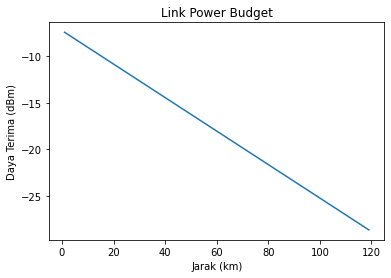

In [ ]:
#Grafik LPB
Graph = np.arange(1,120,1)
LossTotal = 2 * LossKonektor + JumlahSplicer * JumlahSplicer + Graph * LossFiber + MarginSistem
Prx = Ptx_dB - LossTotal
plt.plot(Graph,Prx)
plt.xlabel("Jarak (km)")
plt.ylabel("Daya Terima (dBm)")
plt.title("Link Power Budget")
plt.show()

RISE TIME BUDGET

In [ ]:
#Rise Time Budget

#Twg = tidak diketahui --> 0
#Tmod = 0 (Single Mode)
RTMaterial = DispersiMaterial * Jarak * LebarSpektral #s
RTSistem = np.sqrt(Ttx ** 2 + RTMaterial ** 2 + 0 ** 2 + 0 ** 2 + Trx ** 2)
print("Rise Time Budget")
print("RTB System : ",RTSistem,"s")
if (Tb*0.7 > RTSistem) & (Tb*0.35 > RTSistem):
    print("RTB untuk NRZ dan RZ terpenuhi")
elif (Tb*0.7 > RTSistem):
    print("RTB untuk NRZ terpenuhi")
elif (Tb*0.35 > RTSistem):
    print("RTB untuk RZ terpenuhi")
else :
    print("RTB tidak terpenuhi")

Rise Time Budget
RTB System :  2.845517520592695e-09 s
RTB untuk NRZ terpenuhi


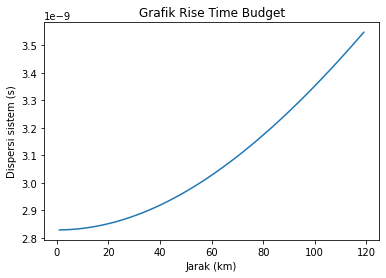

In [ ]:
#Grafik RTB
RTMaterial = DispersiMaterial * Graph * LebarSpektral #s
#Twg = tidak diketahui --> 0
#Tmod = 0 (Single Mode)
RTSistem = np.sqrt(Ttx ** 2 + RTMaterial ** 2 + 0 ** 2 + 0 ** 2 + Trx ** 2)
plt.plot(Graph,RTSistem)
plt.xlabel("Jarak (km)")
plt.ylabel("Dispersi sistem (s)")
plt.title("Grafik Rise Time Budget")
plt.show()